## Try 7.6.1: Exploring natural gas use.

**The Python code below imports natural gas and solar panel production data from a homeowner in the Midwest and creates several plots.**

* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below. When does gas usage tend to be highest? When does solar production tend to be highest?**

In [1]:
# Import packages and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

GasUsage = pd.read_csv('GasUsage_complete.csv')
GasUsage

,Date,Gas,Low,Average,High,SolarkWh,FireHrs,AwayHrs,PanelsFree,ConsumptionkWh,HotWaterkWh,Guests
0,"Tuesday, July 12, 2022",0.00,62,73.04,82,13.402,0.0,0.0,1.0,19.950,1.41,0
1,"Monday, July 11, 2022",0.00,68,75.35,84,6.814,0.0,0.0,1.0,18.095,0.66,0
2,"Sunday, July 10, 2022",0.00,60,71.17,80,13.158,0.0,0.0,1.0,16.851,1.00,0
3,"Saturday, July 9, 2022",0.00,60,70.71,81,12.726,0.0,0.0,1.0,16.039,1.41,0
4,"Friday, July 8, 2022",0.00,68,73.25,79,5.403,0.0,0.0,1.0,17.935,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,"Sunday, February 14, 2021",5.02,-3,3.08,10,0.013,10.0,0.0,0.0,19.419,0.91,0
514,"Saturday, February 13, 2021",4.40,-9,-2.33,5,0.072,13.0,0.0,0.0,17.665,1.33,0
515,"Friday, February 12, 2021",6.42,-7,-0.22,5,0.001,0.0,0.0,0.0,18.687,0.89,0
516,"Thursday, February 11, 2021",6.22,-17,-8.62,-3,0.028,0.0,0.0,0.0,22.315,1.28,0


In [2]:
# Convert date feature to YYYY-MM-DD
GasUsage['Date'] = pd.to_datetime(GasUsage['Date'])
GasUsage

,Date,Gas,Low,Average,High,SolarkWh,FireHrs,AwayHrs,PanelsFree,ConsumptionkWh,HotWaterkWh,Guests
0,2022-07-12,0.00,62,73.04,82,13.402,0.0,0.0,1.0,19.950,1.41,0
1,2022-07-11,0.00,68,75.35,84,6.814,0.0,0.0,1.0,18.095,0.66,0
2,2022-07-10,0.00,60,71.17,80,13.158,0.0,0.0,1.0,16.851,1.00,0
3,2022-07-09,0.00,60,70.71,81,12.726,0.0,0.0,1.0,16.039,1.41,0
4,2022-07-08,0.00,68,73.25,79,5.403,0.0,0.0,1.0,17.935,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,2021-02-14,5.02,-3,3.08,10,0.013,10.0,0.0,0.0,19.419,0.91,0
514,2021-02-13,4.40,-9,-2.33,5,0.072,13.0,0.0,0.0,17.665,1.33,0
515,2021-02-12,6.42,-7,-0.22,5,0.001,0.0,0.0,0.0,18.687,0.89,0
516,2021-02-11,6.22,-17,-8.62,-3,0.028,0.0,0.0,0.0,22.315,1.28,0


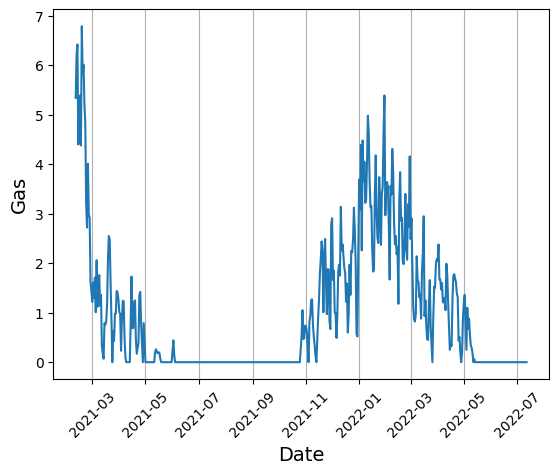

In [4]:
# Time plot of gas usage by date
p1 = sns.lineplot(data=GasUsage, x='Date', y='Gas')
p1.set_xlabel('Date', fontsize=14);
p1.set_ylabel('Gas', fontsize=14);
plt.grid(axis='x');
plt.xticks(rotation=45);

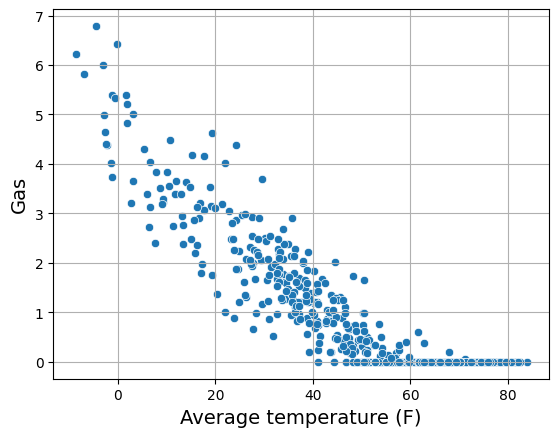

In [5]:
# Scatterplot of gas usage by temperature
p2 = sns.scatterplot(data=GasUsage, x='Average', y='Gas')
p2.set_xlabel('Average temperature (F)', fontsize=14)
p2.set_ylabel('Gas', fontsize=14)
plt.grid()

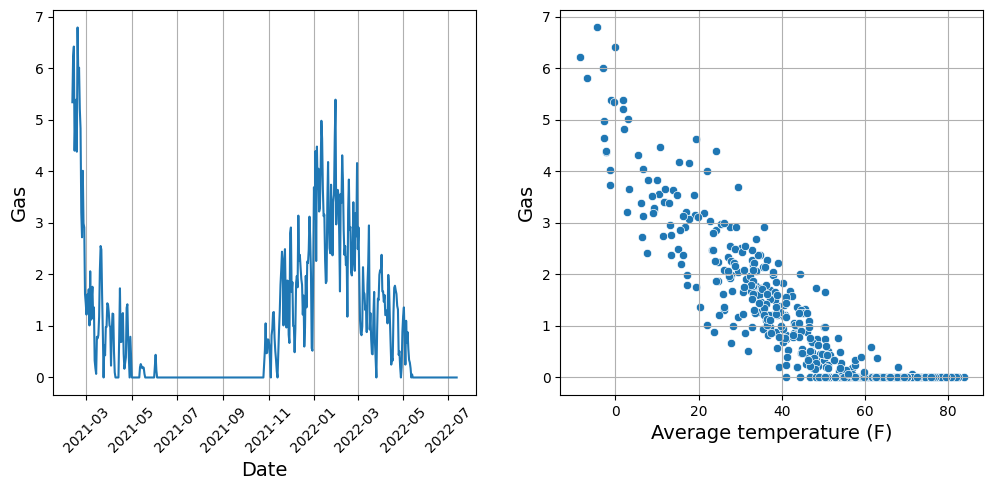

In [6]:
# Combine plots in a single plotting window
# plt.subplot(rows, columns, plot index)
plt.rcParams["figure.figsize"] = (12, 5)

plt.subplot(1, 2, 1)
p1 = sns.lineplot(data=GasUsage, x='Date', y='Gas')
p1.set_xlabel('Date', fontsize=14)
p1.set_ylabel('Gas', fontsize=14)
plt.grid(axis='x')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
p2 = sns.scatterplot(data=GasUsage, x='Average', y='Gas')
p2.set_xlabel('Average temperature (F)', fontsize=14)
p2.set_ylabel('Gas', fontsize=14)
plt.grid()

**Try 7.6.2: Modeling natural gas use.**


**The Python code below imports natural gas and solar panel production data from a homeowner and fits a linear regression model.**

* **Click the double-right arrow to restart the kernel and run all cells.**
    
* **Examine the code below.**

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
GasUsage

,Date,Gas,Low,Average,High,SolarkWh,FireHrs,AwayHrs,PanelsFree,ConsumptionkWh,HotWaterkWh,Guests
0,2022-07-12,0.00,62,73.04,82,13.402,0.0,0.0,1.0,19.950,1.41,0
1,2022-07-11,0.00,68,75.35,84,6.814,0.0,0.0,1.0,18.095,0.66,0
2,2022-07-10,0.00,60,71.17,80,13.158,0.0,0.0,1.0,16.851,1.00,0
3,2022-07-09,0.00,60,70.71,81,12.726,0.0,0.0,1.0,16.039,1.41,0
4,2022-07-08,0.00,68,73.25,79,5.403,0.0,0.0,1.0,17.935,0.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,2021-02-14,5.02,-3,3.08,10,0.013,10.0,0.0,0.0,19.419,0.91,0
514,2021-02-13,4.40,-9,-2.33,5,0.072,13.0,0.0,0.0,17.665,1.33,0
515,2021-02-12,6.42,-7,-0.22,5,0.001,0.0,0.0,0.0,18.687,0.89,0
516,2021-02-11,6.22,-17,-8.62,-3,0.028,0.0,0.0,0.0,22.315,1.28,0


In [10]:
# Remove days with no gas usage
GasUsage = GasUsage[GasUsage['Gas'] > 0]

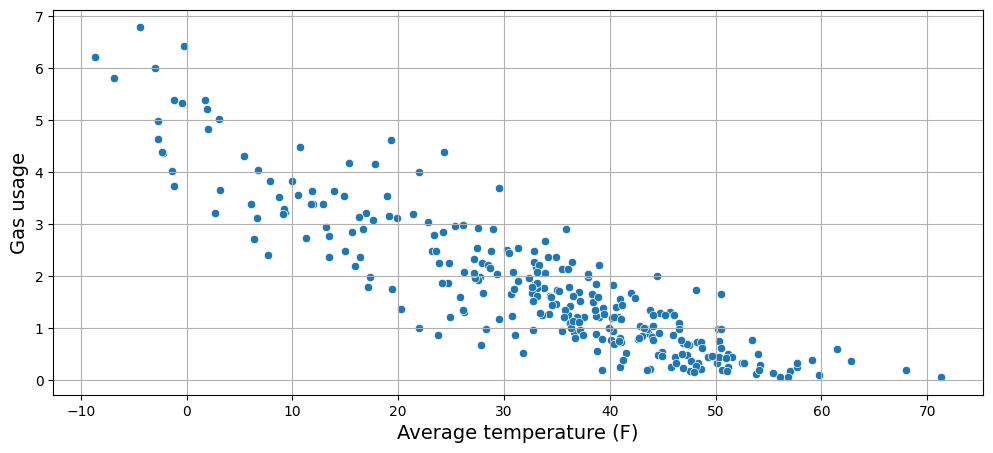

In [11]:
# Scatterplot of gas usage by temperature
p = sns.scatterplot(data=GasUsage, x='Average', y='Gas')
p.set_xlabel('Average temperature (F)', fontsize=14)
p.set_ylabel('Gas usage', fontsize=14)
plt.grid()

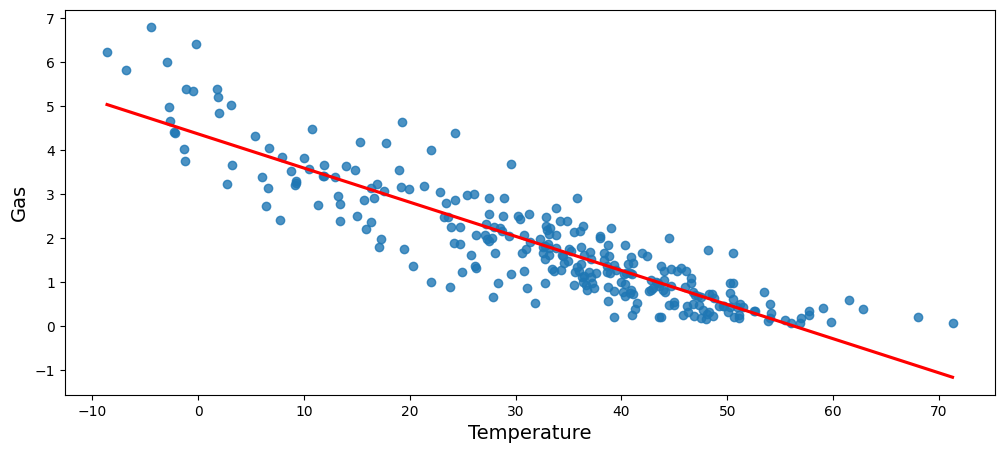

In [12]:
# Scatterplot of gas usage by temperature with regression line
p = sns.regplot(
    data=GasUsage, x='Average', y='Gas', ci=False, line_kws={'color': 'red'}
)
p.set_xlabel('Temperature', fontsize=14);
p.set_ylabel('Gas', fontsize=14);

In [13]:
# Fit linear regression model
LinearModel = LinearRegression()
X = GasUsage['Average'].values.reshape(-1, 1)
y = GasUsage['Gas'].values.reshape(-1, 1)

LinearModel = LinearModel.fit(X.reshape(-1, 1), y)

print('Slope =', LinearModel.coef_)
print('Intercept =', LinearModel.intercept_)

Slope = [[-0.07752534]]
Intercept = [4.3647434]


In [14]:
# Make predictions
LinearModel.predict([[7]])

array([[3.822066]])

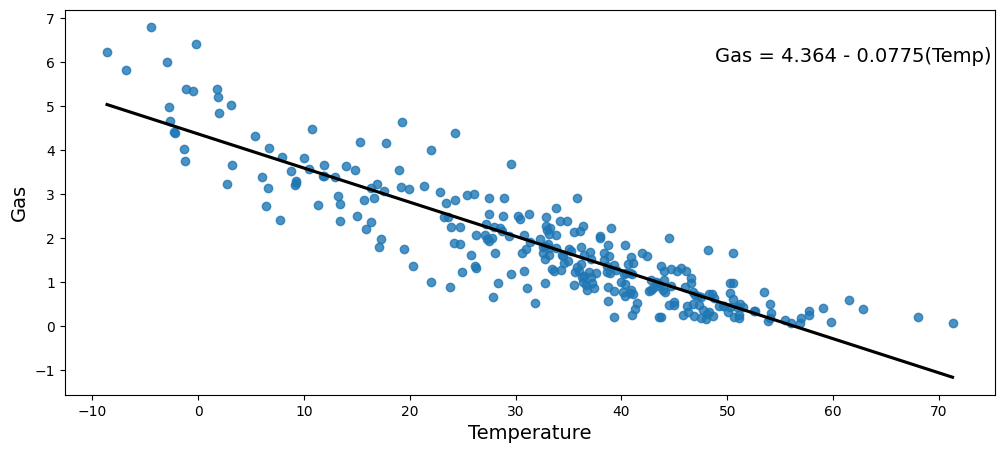

In [15]:
# Scatterplot of gas usage by temperature, with regression equation
p = sns.regplot(
    data=GasUsage, x='Average', y='Gas', ci=False, line_kws={'color': 'black'}
)
p.set_xlabel('Temperature', fontsize=14);
p.set_ylabel('Gas', fontsize=14)
plt.text(
    75,
    6,
    "Gas = 4.364 - 0.0775(Temp)",
    horizontalalignment='right',
    size=14,
    color='black',
);

**Try 7.6.3: Evaluating the natural gas model.**

**The Python code below imports natural gas data from a homeowner, fits a linear regression model, and creates residual plots for the model.**
* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

In [16]:
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [17]:
GasUsage

,Date,Gas,Low,Average,High,SolarkWh,FireHrs,AwayHrs,PanelsFree,ConsumptionkWh,HotWaterkWh,Guests
60,2022-05-13,0.06,58,71.29,85,14.485,0.0,7.0,1.0,6.732,1.08,0
62,2022-05-11,0.18,42,57.00,68,15.403,0.0,0.0,1.0,9.819,2.81,0
63,2022-05-10,0.29,48,54.15,63,6.826,0.0,7.0,1.0,9.191,1.12,0
64,2022-05-09,0.34,48,52.52,59,5.778,0.0,7.0,1.0,7.993,1.31,0
65,2022-05-08,0.55,35,44.97,60,15.215,0.0,7.0,1.0,9.157,1.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,2021-02-14,5.02,-3,3.08,10,0.013,10.0,0.0,0.0,19.419,0.91,0
514,2021-02-13,4.40,-9,-2.33,5,0.072,13.0,0.0,0.0,17.665,1.33,0
515,2021-02-12,6.42,-7,-0.22,5,0.001,0.0,0.0,0.0,18.687,0.89,0
516,2021-02-11,6.22,-17,-8.62,-3,0.028,0.0,0.0,0.0,22.315,1.28,0


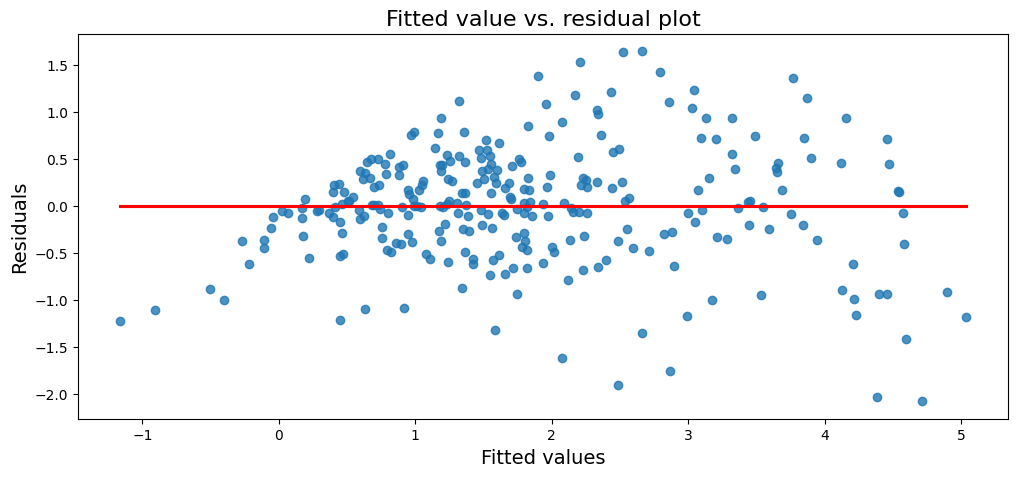

In [18]:
# Fitted value vs. residual plot
p = sns.regplot(
    x=LinearModel.predict(X),
    y=LinearModel.predict(X) - y,
    ci=False,
    line_kws={'color': 'red'},
)
p.set_xlabel('Fitted values', fontsize=14);
p.set_ylabel('Residuals', fontsize=14);
p.set_title('Fitted value vs. residual plot', fontsize=16);

In [19]:
# Normal Q-Q plot
resid = np.ravel(LinearModel.predict(X)) - np.ravel(y)
p = sm.qqplot(resid, line='45', scale=resid.std())

plt.title('Normal Q-Q plot', fontsize=16);
plt.xlabel('Theoretical quantiles', fontsize=14);
plt.ylabel('Sample quantiles', fontsize=14);

NameError: name 'sm' is not defined

## Try 7.6.4: Expanding the natural gas model.

**The Python code below imports natural gas data from a homeowner and plots several polynomial regression models.**
* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**

In [20]:

from sklearn.preprocessing import PolynomialFeatures

In [21]:
GasUsage

,Date,Gas,Low,Average,High,SolarkWh,FireHrs,AwayHrs,PanelsFree,ConsumptionkWh,HotWaterkWh,Guests
60,2022-05-13,0.06,58,71.29,85,14.485,0.0,7.0,1.0,6.732,1.08,0
62,2022-05-11,0.18,42,57.00,68,15.403,0.0,0.0,1.0,9.819,2.81,0
63,2022-05-10,0.29,48,54.15,63,6.826,0.0,7.0,1.0,9.191,1.12,0
64,2022-05-09,0.34,48,52.52,59,5.778,0.0,7.0,1.0,7.993,1.31,0
65,2022-05-08,0.55,35,44.97,60,15.215,0.0,7.0,1.0,9.157,1.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
513,2021-02-14,5.02,-3,3.08,10,0.013,10.0,0.0,0.0,19.419,0.91,0
514,2021-02-13,4.40,-9,-2.33,5,0.072,13.0,0.0,0.0,17.665,1.33,0
515,2021-02-12,6.42,-7,-0.22,5,0.001,0.0,0.0,0.0,18.687,0.89,0
516,2021-02-11,6.22,-17,-8.62,-3,0.028,0.0,0.0,0.0,22.315,1.28,0


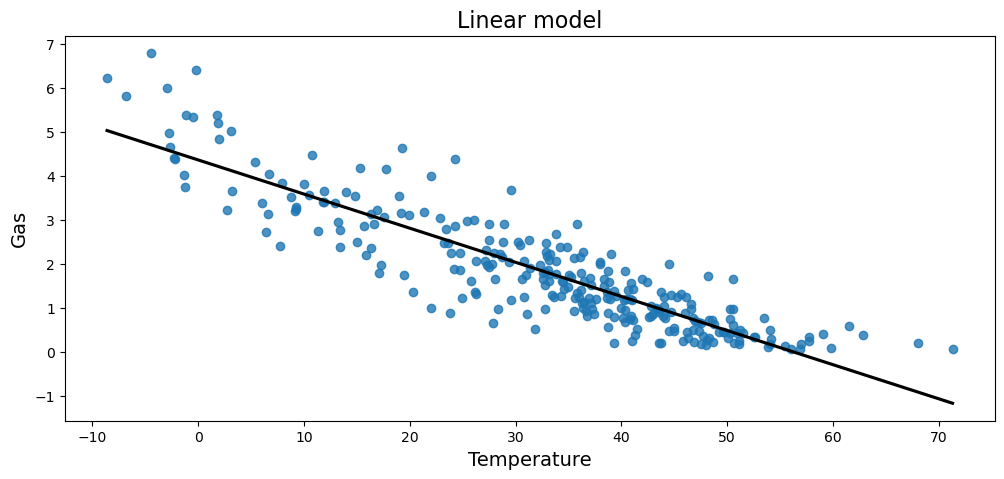

In [137]:
# Scatterplot of gas usage by temperature with linear model
p = sns.regplot(
    data=GasUsage, x='Average', y='Gas', ci=False, line_kws={'color': 'black'}
)
p.set_xlabel('Temperature', fontsize=14);
p.set_ylabel('Gas', fontsize=14);
p.set_title('Linear model', fontsize=16);

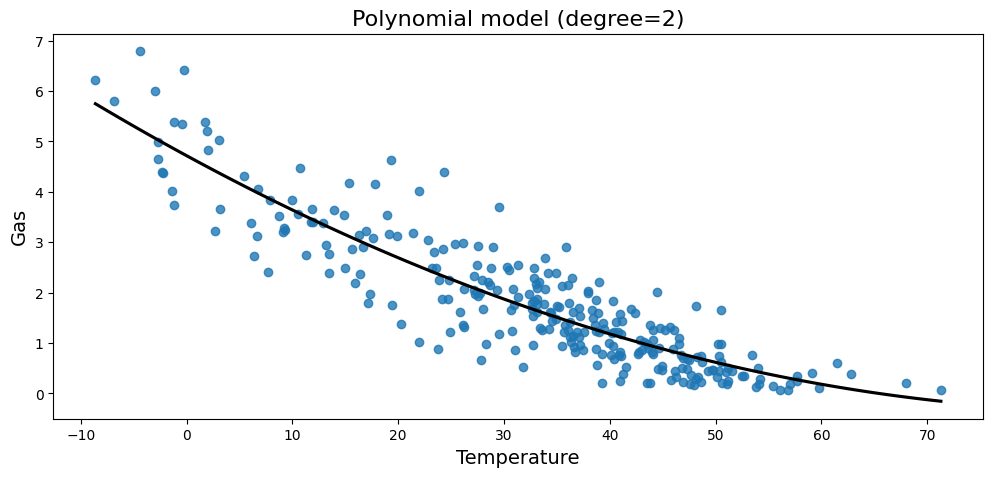

In [22]:
# Scatterplot of gas usage by temperature with degree 2 polynomial model
p = sns.regplot(
    data=GasUsage, x='Average', y='Gas', ci=False, line_kws={'color': 'black'}, order=2
)
p.set_xlabel('Temperature', fontsize=14);
p.set_ylabel('Gas', fontsize=14);
p.set_title('Polynomial model (degree=2)', fontsize=16);

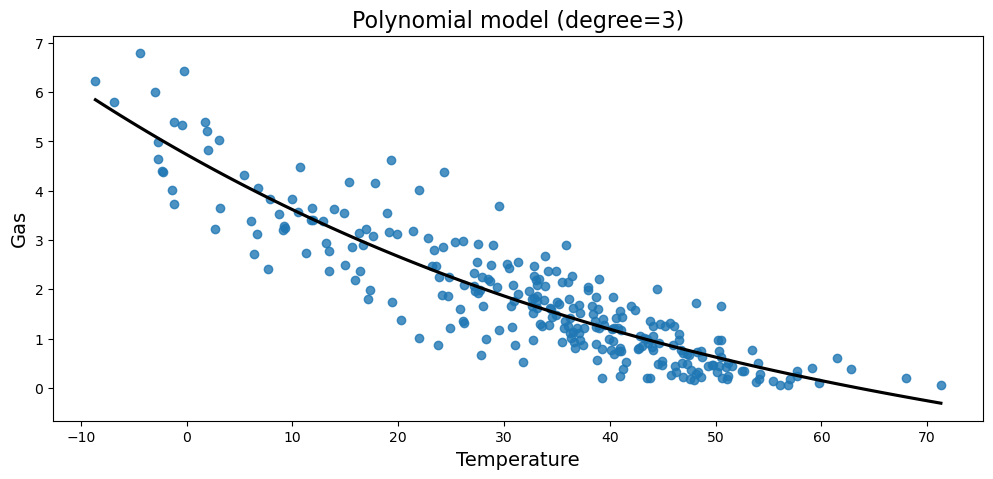

In [141]:
# Scatterplot of gas usage by temperature with degree 3 polynomial model
p = sns.regplot(
    data=GasUsage, x='Average', y='Gas', ci=False, line_kws={'color': 'black'}, order=3
)
p.set_xlabel('Temperature', fontsize=14);
p.set_ylabel('Gas', fontsize=14);
p.set_title('Polynomial model (degree=3)', fontsize=16);

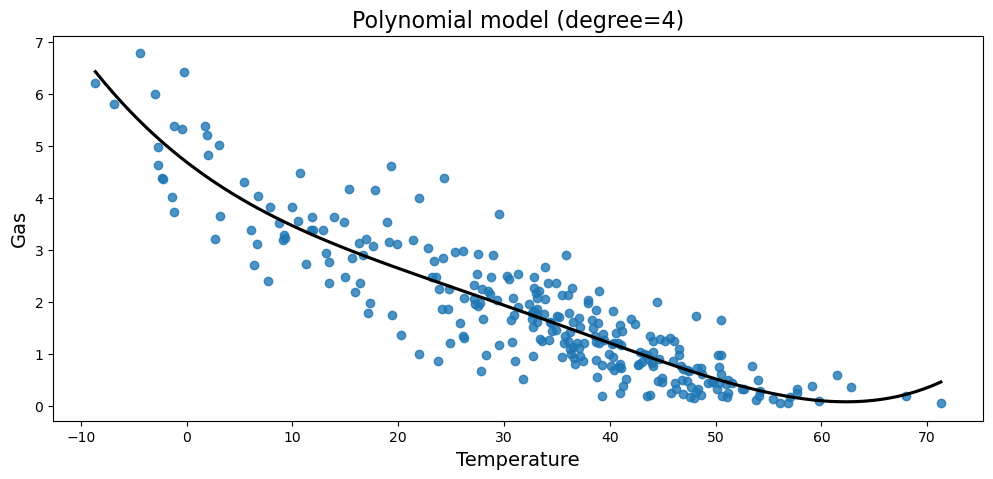

In [143]:
# Scatterplot of gas usage by temperature with degree 4 model
p = sns.regplot(
    data=GasUsage, x='Average', y='Gas', ci=False, line_kws={'color': 'black'}, order=4
)
p.set_xlabel('Temperature', fontsize=14);
p.set_ylabel('Gas', fontsize=14);
p.set_title('Polynomial model (degree=4)', fontsize=16);

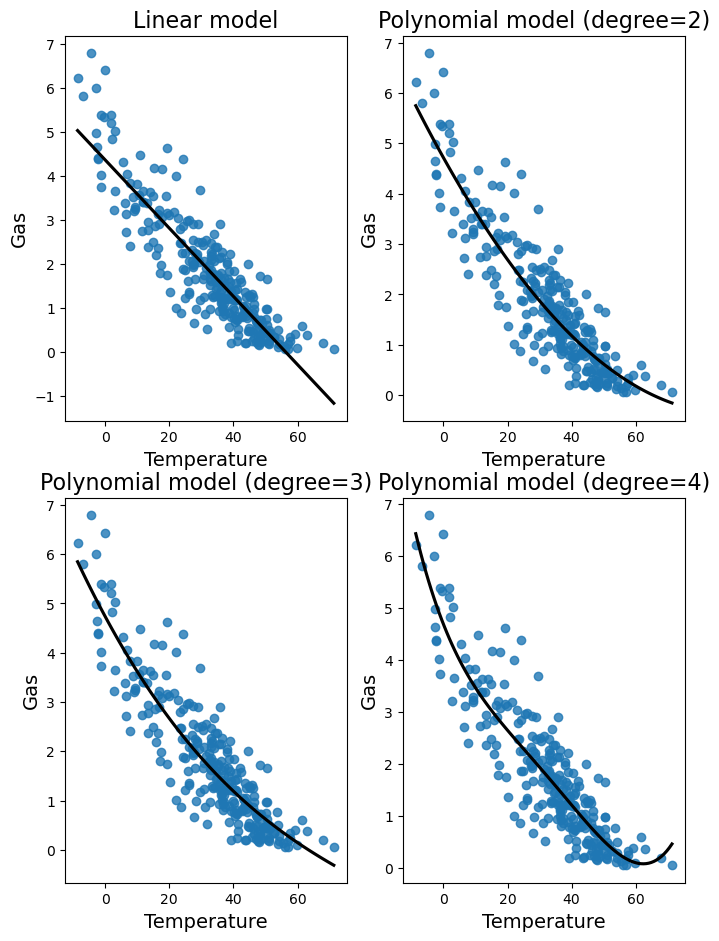

In [153]:
# plt.subplot(rows, columns, plot index)
plt.rcParams["figure.figsize"] = (8, 11)

plt.subplot(2, 2, 1)
p = sns.regplot(
    data=GasUsage, x='Average', y='Gas', ci=False, line_kws={'color': 'black'}
)
p.set_xlabel('Temperature', fontsize=14)
p.set_ylabel('Gas', fontsize=14)
p.set_title('Linear model', fontsize=16)

plt.subplot(2, 2, 2)
p = sns.regplot(
    data=GasUsage, x='Average', y='Gas', ci=False, line_kws={'color': 'black'}, order=2
)
p.set_xlabel('Temperature', fontsize=14)
p.set_ylabel('Gas', fontsize=14)
p.set_title('Polynomial model (degree=2)', fontsize=16)

plt.subplot(2, 2, 3)
p = sns.regplot(
    data=GasUsage, x='Average', y='Gas', ci=False, line_kws={'color': 'black'}, order=3
)
p.set_xlabel('Temperature', fontsize=14)
p.set_ylabel('Gas', fontsize=14)
p.set_title('Polynomial model (degree=3)', fontsize=16)

plt.subplot(2, 2, 4)
p = sns.regplot(
    data=GasUsage, x='Average', y='Gas', ci=False, line_kws={'color': 'black'}, order=4
)
p.set_xlabel('Temperature', fontsize=14);
p.set_ylabel('Gas', fontsize=14);
p.set_title('Polynomial model (degree=4)', fontsize=16);